# **Insper - Eletromagnetismo e Ondulatória** #


**Aula 9 - Transformador**

**Item 14** - Calculando correntes e tensões em um transformador AC



In [47]:
#Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

<img src ='circuito.jfif' width='600'>

---
Na célula a seguir:

a) Declare os parâmetros de nosso transformador: $R_1=6\Omega$, $R_2=3\Omega$, $L_1=300mH$, $L_2=30mH$, frequência $f=60 Hz$ e tensão $V_1=50cos(\omega t)$.

b) Calcule:

- Frequência angular $\omega$
- Indutância Mútua $M$
- Reatâncias indutivas de $L_1$ e $L_2$, ou seja $XL1$ e $XL2$
- Reatância indutiva mútua $XM$

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"

In [175]:
listaf = np.arange(10,100e3,10)

#indutâncias
L=300e-3

#resistências
R=0.5
listaRc = np.arange(0.3,0.6,0.1)

#capcitancias
C = 1e-6

# Lista de possíveis K:
listak = np.linspace(0.085,0.15,10)

#tensão da fonte (pico)
Ufonte=5

w = 1/(math.sqrt(L*C))
f = w/(2*math.pi)

print(f'Valore referencia:{f}')

Valore referencia:290.5758415662736


c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [131]:
def CalcularTransformador(Uf, Rc, XM, XC, XL):
    
    Xeq = (Rc/(Rc*1j*w*C+1))
    
    Z=np.array([[R+XL+XC, -XM],[-XM, Xeq+R+XL]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    i1 =  i[0]
    i2 =  i[1]
    
    V2 = Xeq*i2
    icarga = V2/Rc
    
    return i1, i2, icarga , V2

d) Calcule as correntes $i_1$ e $i_2$ para três condições de carga ($R_C=1M\Omega$, $R_C=100\Omega$ e $R_C=1\Omega$). Assim que calcular as correntes, calcule também $V_2$ para cada resistor de carga (analise o circuito para saber como calculá-la). Por fim, calcule as relações $N_1/N_2$, $e_1/e_2$ e $V_1/V_2$ e, o mais importante: calcule as potências no primário ($S1$) e no secundário ($S2$).

IMPORTANTE: para dar print nas relações $N_1/N_2$, $V_1/V_2$ e $e_1/e_2$, você precisará usar o **módulo dos fasores**. Para calcular o módulo de um número complexo, use "np.abs(número complexo)".

Maior valor de i = 0.0 com k = 0.0
Maior valor de i = 0.05645191495313098 com k = 0.1
Maior valor de i = 0.049491753373083744 com k = 0.2
Maior valor de i = 0.0380657937914057 com k = 0.30000000000000004
Maior valor de i = 0.031261557841412164 com k = 0.4
Maior valor de i = 0.02541742096930791 com k = 0.5
Maior valor de i = 0.022512859538361952 com k = 0.6000000000000001
Maior valor de i = 0.021696876832349245 com k = 0.7000000000000001
Maior valor de i = 0.02343649373722845 com k = 0.8
Maior valor de i = 0.03020477374798586 com k = 0.9


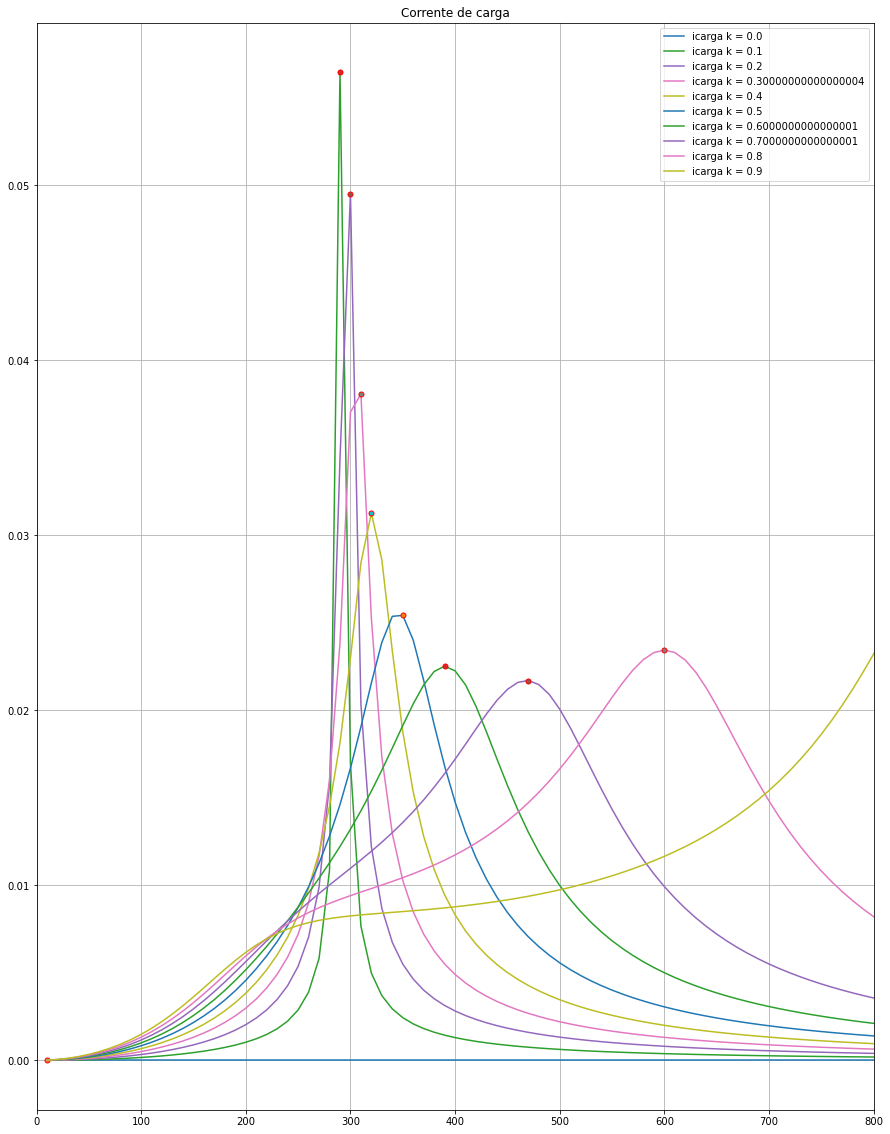

In [164]:
Rc= 400
listak=np.arange(0,1,0.1)
listaV2= []

plt.figure(figsize=(15,20))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
        listai2.append(np.abs(i2))
        listaicarga.append(np.abs(icarga))
        
        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(S2.real)
        listaPot_entrada.append(S1.real)
        listaGanho.append(S2.real/S1.real)
        
    icaraga_max = max(np.abs(listaicarga))
    index = list(np.abs(listaicarga)).index(icaraga_max)
    Pmax = (listaf[index],icaraga_max)
    print(f'Maior valor de i = {icaraga_max} com k = {k}')
    
    plt.plot(listaf, listaicarga, label=f'icarga k = {k}')
    plt.plot(Pmax[0],Pmax[1],marker="o", markersize=5, markeredgecolor="red")
plt.grid(True)
plt.xlim(0,800)
plt.legend()
plt.title("Corrente de carga")
plt.show()
    
    
    

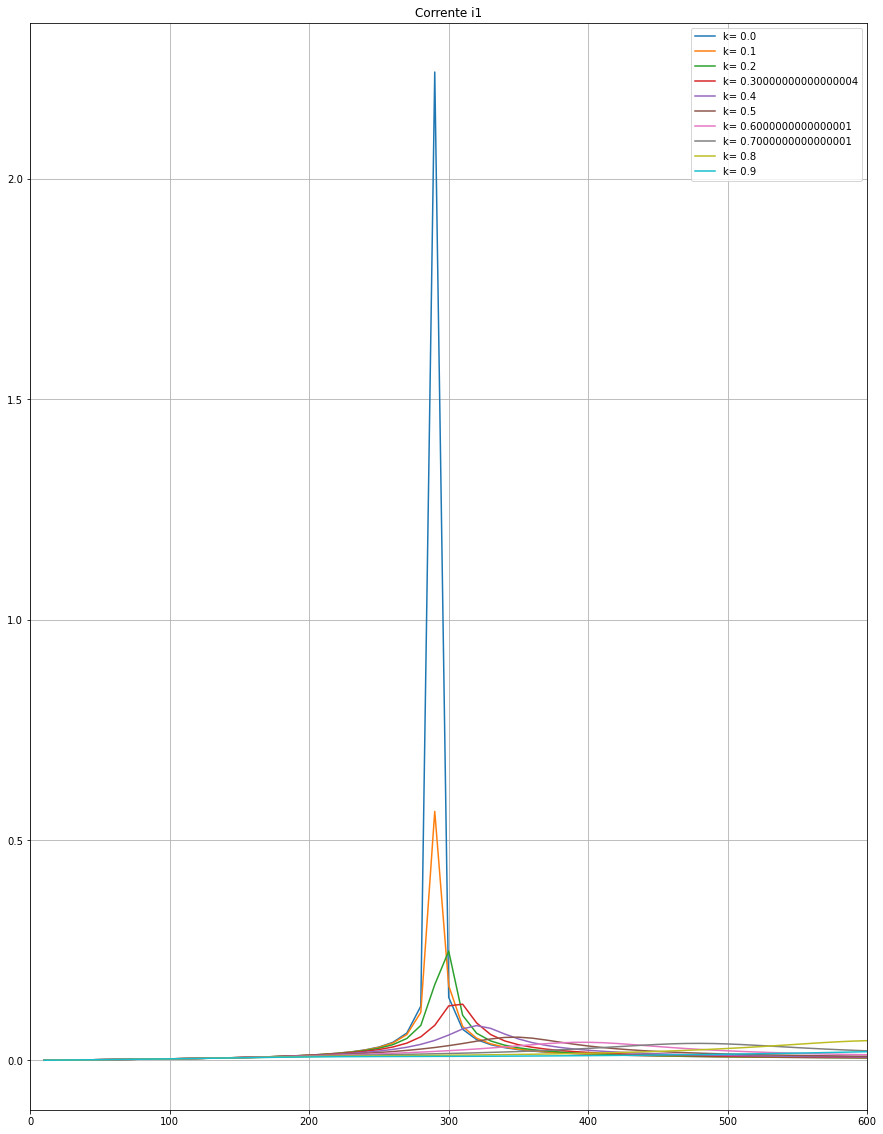

In [165]:
Rc= 400
listak=np.arange(0,1,0.1)
listaV2= []

plt.figure(figsize=(15,20))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
        listai2.append(np.abs(i2))
        listaicarga.append(np.abs(icarga))
        
        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(S2.real)
        listaPot_entrada.append(S1.real)
        listaGanho.append(S2.real/S1.real)
        
    icaraga_max = max(np.abs(listaicarga))
    index = list(np.abs(listaicarga)).index(icaraga_max)
    Pmax = (listaf[index],icaraga_max)
    
    plt.plot(listaf, listai1, label=f'k= {k}')
plt.grid(True)
plt.title("Corrente i1")
plt.xlim(0,600)
plt.legend()
plt.show()    

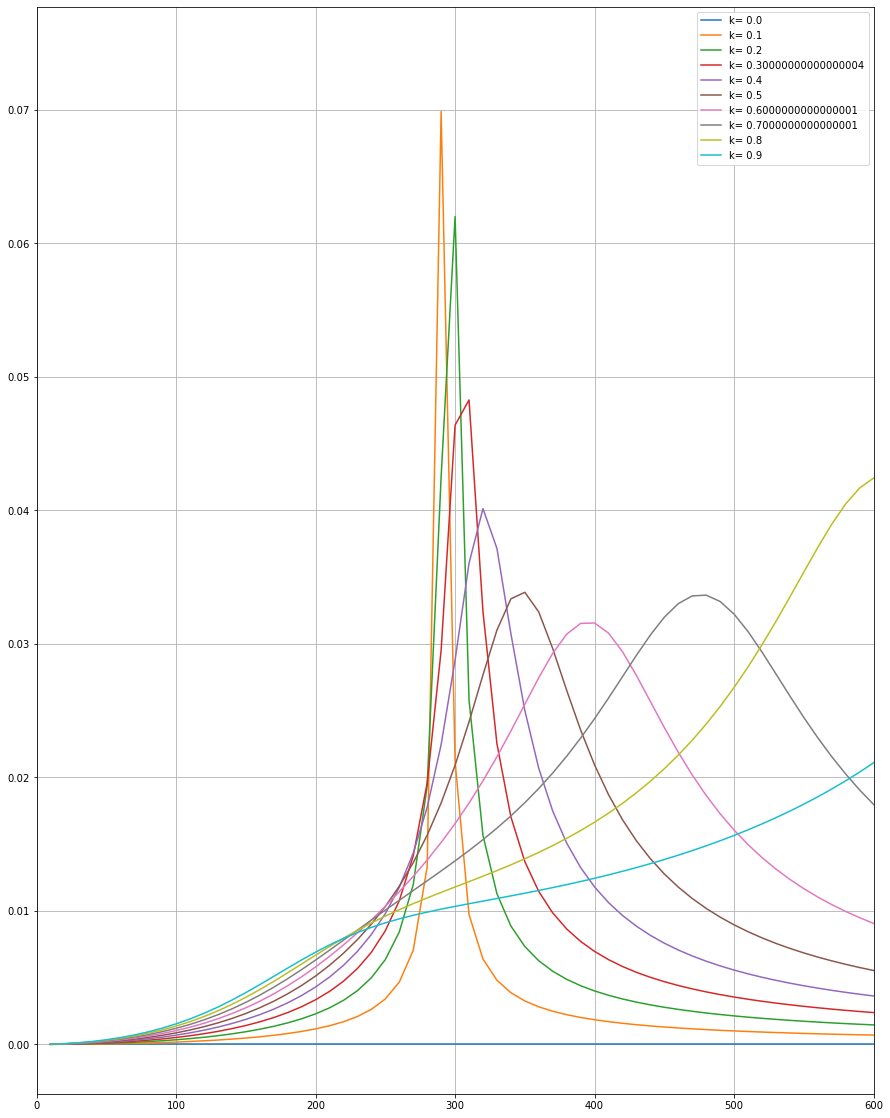

In [166]:
Rc= 400
listak=np.arange(0,1,0.1)
listaV2= []

plt.figure(figsize=(15,20))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
        listai2.append(np.abs(i2))
        listaicarga.append(np.abs(icarga))
        
        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(S2.real)
        listaPot_entrada.append(S1.real)
        listaGanho.append(S2.real/S1.real)
        
    icaraga_max = max(np.abs(listaicarga))
    index = list(np.abs(listaicarga)).index(icaraga_max)
    Pmax = (listaf[index],icaraga_max)
    
    plt.plot(listaf, listai2, label=f'k= {k}')
plt.grid(True)
plt.xlim(0,600)
plt.legend()
plt.show()
    
    
    
    

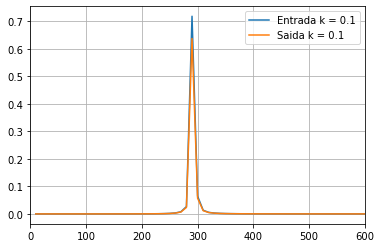

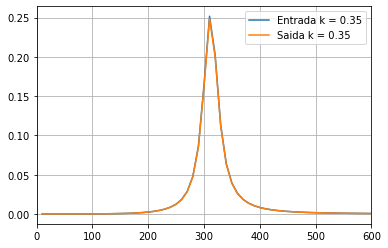

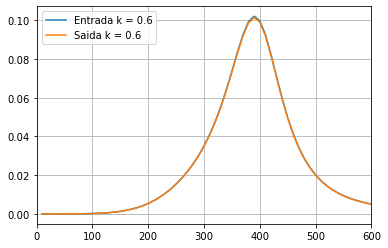

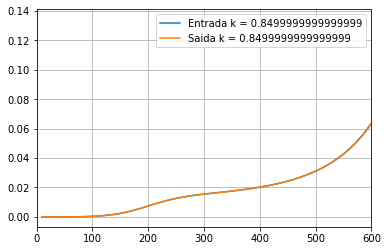

In [177]:
Rc= 400
listak=np.arange(0.1,1,0.25)
listaV2= []

# plt.figure(figsize=(15,20))

for k in listak:
    listaPot_entrada = []
    listaPot_saida = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(S2.real)
        listaPot_entrada.append(S1.real)
    
    plt.plot(listaf, listaPot_entrada, label=f'Entrada k = {k}')
    plt.plot(listaf, listaPot_saida, label=f'Saida k = {k}')
    plt.grid()
    plt.legend()

    plt.xlim(0,600)
    plt.show()

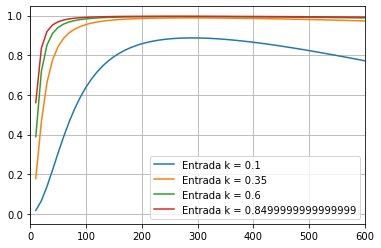

In [169]:
Rc= 400
listak=np.arange(0.1,1,0.1)
listaV2= []

for k in listak:
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(S2.real)
        listaPot_entrada.append(S1.real)
        listaGanho.append(S2.real/S1.real)
    
    plt.plot(listaf, listaGanho, label=f'Entrada k = {k}')
    plt.legend()
    
plt.grid(True)
plt.xlim(0,600)
plt.show()

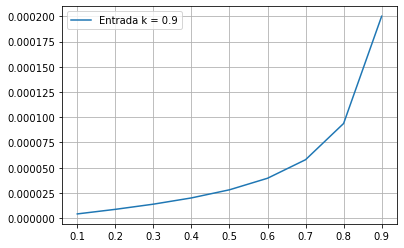

In [178]:
Rc= 400
listak=np.arange(0.1,1,0.1)
listaPicoV2 = []
listaV2= []

for k in listak:    
    w = 2*math.pi*f
    M = k*sqrt(L*L)

    XM=1j*w*M
    XC = 1/(w*C*1j)
    XL = 1j*w*L

    i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)
    listaV2.append(np.abs(V_carga))

    listaPicoV2.append(max(listaV2))
    
plt.plot(listak, listaPicoV2, label=f'Entrada k = {k}')
plt.legend()
plt.grid(True)
plt.show()

e) Recalcule o item **d)**, mas agora considerando que o transformador é **ideal**. Para isso, basta zerar as resistências R1 e R2 do primário e do secundário. Após zer-a-las, copie o código do item d) na célula abaixo. O que você pode concluir sobre a potência real nas três condições de carga?

In [42]:
R1=0
R2=0

listaRc=[1e6, 100, 1]

for Rc in listaRc:
    i1, i2 = CalcularTransformador(Ufonte, Rc)
    V2=i2*Rc
    V1=Ufonte
    e1=-XL1*i1+XM*i2
    e2=-XM*i1+XL2*i2  
    S1=V1/sqrt(2)*i1.conjugate()/sqrt(2)
    S2=V2/sqrt(2)*i2.conjugate()/sqrt(2)
    print('Com resistor na saída de %.2f Ω:' %Rc)
    print('i1 (pico) = %.2f A' %np.abs(i1))
    print('i2 (pico) = %.2f A' %np.abs(i2))
    print('V1 (pico) = %.2f V' %Ufonte)    
    print('V2 (pico) = %.2f V' %(np.abs(V2)))
    print('Relação N1/N2 = %.2f' %(np.abs(sqrt(L1/L2))))
    print('Relação e1/e2 = %.2f' %(np.abs(e1/e2)))
    print('Relação V1/V2 = %.2f' %(np.abs(V1/(V2))))
    print('S1 = %.2f +j%.2f' %(S1.real,S1.imag))
    print('S2 = %.2f +j%.2f' %(S2.real,S2.imag))
    print('Eficiência = %.2f' %(S2.real/S1.real))
    print('---')


TypeError: CalcularTransformador() missing 3 required positional arguments: 'XM', 'XC', and 'XL'